# DAPL ML Zero - Getting Started with Machine Learning 
## Regression

Author: Spencer Bertsch  

The purpose of this notebook is to show the different types of supervised learning and a few very simple implementations of solutions. 

All data used in this notebook came from the [UCI Machine Learning Repository.](https://archive.ics.uci.edu/ml/datasets.php)

In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use("fivethirtyeight")
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [2]:
p: str = os.path.abspath('')
base_path: str = p + '/data/'
print(f'Your data files should be in the following directory: {base_path}')

Your data files should be in the following directory: /Users/spencerbertsch/Desktop/dev/DAPL/ML_Intro/data/


### Regression

The goal here is to train a model how to predict a **continuous value** that represents the home value based on several predictor variables. 

[Data source.](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

Step 1: Read the data into memory using pandas

In [3]:
df_path: str = base_path + 'real_estate_valuation.xlsx'
df: pd.DataFrame = pd.read_excel(df_path, header=[0])
df.tail(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500000,6.5,90.45606,9,24.97433,121.54310,63.9


In [4]:
X = df.iloc[:, 1 : -1]  # <-- we do this to leave out the first column (id column so we don't need it) and the last column (response)
y = df['Y house price of unit area']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
# Create linear regression object
clf = LinearRegression()

# Train the model using the training sets
clf.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = clf.predict(X_test)

In [7]:
# We can now examine the betas (coefficients) of our multivariate regression model 
print(f"Coefficients: {clf.coef_}")
print(f"Mean squared error: {round(mean_squared_error(y_test, y_pred), 3)}")
print(f"R Squared: {round(r2_score(y_test, y_pred), 3)}")

Coefficients: [ 5.78644650e+00 -2.41915440e-01 -5.34853651e-03  1.05117039e+00
  2.49849155e+02 -6.48154142e+01]
Mean squared error: 71.483
R Squared: 0.554


## Univariate regression

Let's visualize a univariate regression model in which we use house age as the only predictor variable

In [15]:
predictor_variable: str = 'X3 distance to the nearest MRT station'

In [16]:
X = df[predictor_variable]  # <-- now we're doing univariate regression! (One predictor)
y = df['Y house price of unit area']
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
clf = linear_model.LinearRegression()
clf.fit(X_train.reshape(-1, 1), y_train) 

LinearRegression()

In [18]:
beta = clf.coef_
intercept = clf.intercept_
print('beta = ', beta)
print('intercept= ', intercept)

beta =  [-0.00764601]
intercept=  46.65147890863054


In [19]:
y_pred = clf.predict(X_test.reshape(-1, 1))

In [20]:
# We can now examine the betas (coefficients) of our multivariate regression model 
print(f"Coefficients: {clf.coef_}")
print(f"Mean squared error: {round(mean_squared_error(y_test, y_pred), 3)}")
print(f"R Squared: {round(r2_score(y_test, y_pred), 3)}")

Coefficients: [-0.00764601]
Mean squared error: 91.675
R Squared: 0.428


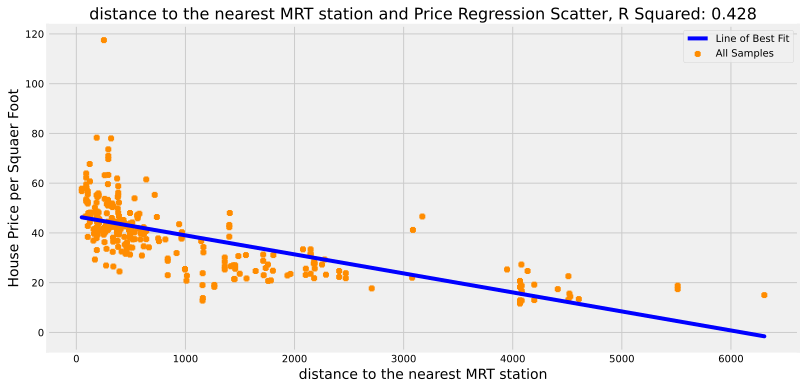

In [21]:
figure(figsize=(12, 6), dpi=80)
plt.scatter(X_train, y_train, color='darkorange', marker= '+', label= 'All Samples')
plt.plot(X_train, clf.predict(X_train.reshape(-1, 1)), color='blue', label='Line of Best Fit')
plt.grid()
plt.xlabel(predictor_variable[3:], fontsize=14)
plt.ylabel('House Price per Squaer Foot', fontsize=14)
plt.title(f'{predictor_variable[3:]} and Price Regression Scatter, R Squared: {round(r2_score(y_test, y_pred), 3)}', fontsize=16)
plt.legend()
plt.grid()

# How can we improve this model? 

- Use nonlinear regression models
    - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
- Use other predictors!
    - Do other predictors give us a model that has a smaller mean squared error? Which predictor gives us the highest performing univariate regression model? 
- Is there any way we can better utilize the lat and long features? Could we combine these into a single feature that might help the model differentiate between nicer neighborhoods? 